# **PROJECT 1**

### *PROBLEM STATMENT:-*

The world of retail is changing rapidly. Many closing and being replaced by online stores, direct-to-consumer brands, and subscription/membership services. However, whilesomething that drives customers to a website, a lot of eCommerce platforms fail to sell through a high percentage of their merchandise. This is often due to poor user browsing experience. Customers can spend hours scrolling through hundreds, sometimes thousands of items of merchandise never finding an item they like and same goes for the movie suggestion to keep them entrtain and make them stay and re visit the website there is a recommadation system to show them suggestions based on their likes and needs in order to create a better watching  environment that boosts  and increases the time spent on a website.

This series will demonstrate a popular solution to this problem, recommender engines!

**TYPE OF RECOMMENDATION SYSTEM :-**

1.Content based filtering 


2.Age recommender system

3.Demographic Filtering

4.Collaborative Filtering

In [201]:
#COLLECION OF DATA 

_**IMPORTING THE NECESSARY LIBRARIES**_

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

*LOADING OUR DATA*

-There are two dataset 

    1.1st Dataset is containing movie title and and item_id

    2.2nd Datset is containing rating of movie and time stamp


### Uploading the first data set 

In [211]:
movies_data=pd.read_csv("Movie_Id_Titles.csv")

### Getting to know our data 

In [214]:
movies_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [20]:
movies_data.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [21]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [216]:
movies_data['title'].nunique()

1664

In [218]:
movies_data['title'].unique()

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'B. Monkey (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)

In [220]:
movies_data['title'].isnull().sum()

0

In [222]:
movies_data['title']=='nan'
    


0       False
1       False
2       False
3       False
4       False
        ...  
1677    False
1678    False
1679    False
1680    False
1681    False
Name: title, Length: 1682, dtype: bool

In [224]:
movies_data.shape

(1682, 2)

In [226]:
movies_data[movies_data.duplicated('title')]

,item_id,title
267,268,Chasing Amy (1997)
302,303,Ulee's Gold (1997)
347,348,Desperate Measures (1998)
499,500,Fly Away Home (1996)
669,670,Body Snatchers (1993)
679,680,Kull the Conqueror (1997)
864,865,"Ice Storm, The (1997)"
880,881,Money Talks (1997)
1002,1003,That Darn Cat! (1997)
1256,1257,"Designated Mourner, The (1997)"


### Uploading the 2nd dataset having rating and time stamp 

In [229]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_data = pd.read_csv('u.csv', sep='\t', names=column_names)

### Getting to know our 2nd dataset 

In [232]:
ratings_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [234]:
ratings_data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [236]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [238]:
ratings_data.shape

(100003, 4)

In [240]:
ratings_data['rating'].nunique()

5

In [242]:
ratings_data['rating'].unique()

array([5, 1, 3, 2, 4], dtype=int64)

In [244]:
ratings_data['rating'].isnull().sum()

0

In [246]:
# there is not need to clean our data  filtereing

In [248]:
df = pd.merge(ratings_data,movies_data,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


# getting the info of merged data

In [251]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [253]:
df.shape

(100003, 5)

In [259]:
df['rating'].nunique()

5

In [265]:
df['title'].nunique()

1664

In [267]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

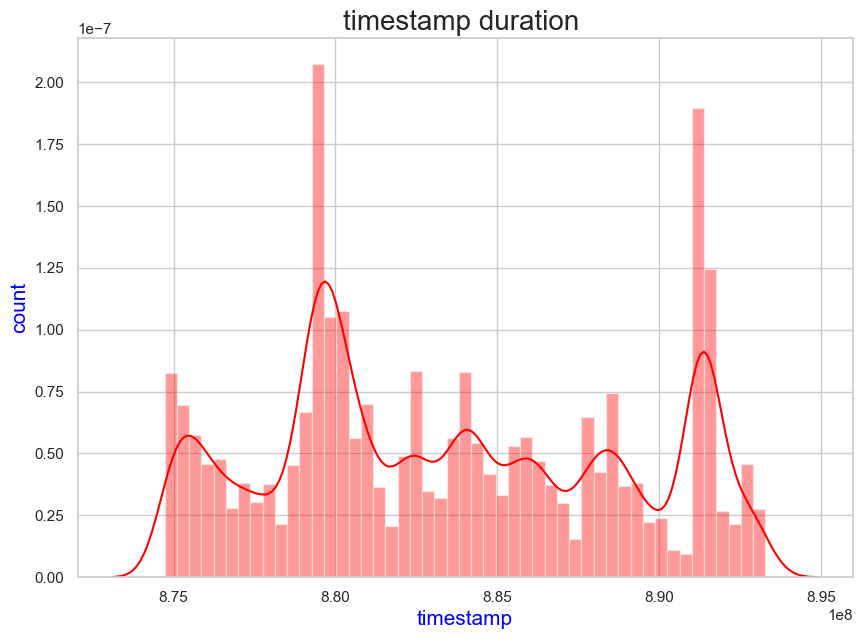

In [269]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.distplot(df['timestamp'],color='red')
plt.title('timestamp duration ',fontsize=20)
plt.xlabel('timestamp',fontsize=15,color='blue')
plt.ylabel('count',fontsize=15,color='blue')
plt.show()

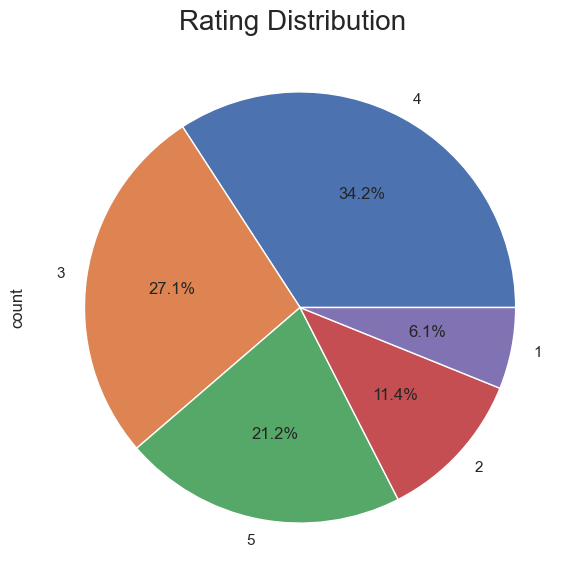

In [270]:
plt.figure(figsize=(10,7))
df['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Rating Distribution  ',fontsize=20)
plt.show()

In [272]:
x=df[['rating','timestamp']]
x.head()

,rating,timestamp
0,5,881250949
1,5,881250949
2,1,881250949
3,3,881250949
4,3,891717742


In [275]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=1)
    km.fit(x)
    wcss.append(km.inertia_)

# First we will be seeing Collabrating filtering 
**This sytem matches persons with similar interests and provides recommendation beased on the matching . callaborative filiters do not requires item , it's content based**

In [277]:
 # here is we are finding the movies with highest rating , by finding there avg of totall rating they have gotten 

In [279]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [282]:
# above we have problem now as we can see that there are movies with 5 star rating but some of them are only seen by one user and got 5 sits in top 
we need to find movies with higher rating with higher number of user 


SyntaxError: invalid syntax (1537134131.py, line 2)

popular one

In [285]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [287]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [289]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

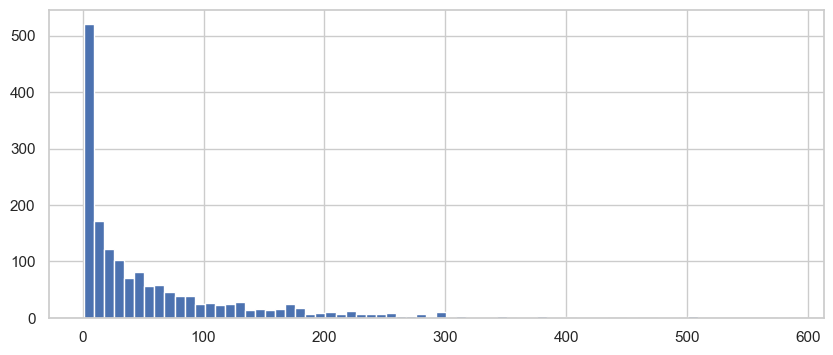

In [291]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

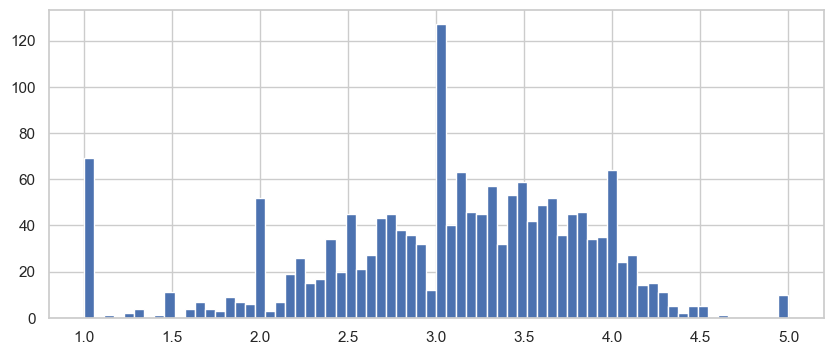

In [292]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

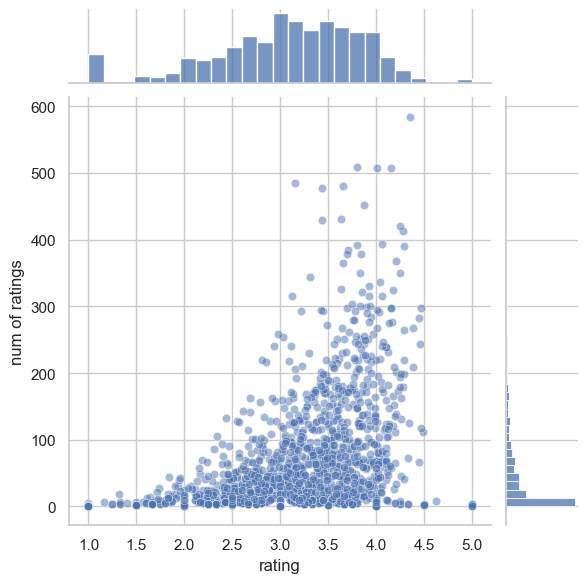

In [294]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [296]:
pv = df.pivot_table(index='user_id',columns='title',values='rating')
pv.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
df.shape

(100003, 5)

In [301]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [303]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [305]:
Contact_user_ratings = pv['Contact (1997)']
Contact_user_ratings.head(10)

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
6    2.0
7    4.0
8    5.0
9    NaN
Name: Contact (1997), dtype: float64

In [307]:
Fargo_user_ratings = pv['Fargo (1996)']
Fargo_user_ratings.head(10)

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
6    5.0
7    5.0
8    NaN
9    NaN
Name: Fargo (1996), dtype: float64

In [56]:
similar_to_Contact = pv.corrwith(Contact_user_ratings)
similar_to_Fargo = pv.corrwith(Fargo_user_ratings)

C:\Users\rawat\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\rawat\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\rawat\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\rawat\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\rawat\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [57]:
corr_starwars = pd.DataFrame(similar_to_Contact,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
101 Dalmatians (1996),-0.204124
12 Angry Men (1957),-0.636364
2001: A Space Odyssey (1968),-0.541002
"Adventures of Priscilla, Queen of the Desert, The (1994)",-0.866025
"African Queen, The (1951)",-0.271163


In [58]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Restoration (1995),1.0
Judgment Night (1993),1.0
Grumpier Old Men (1995),1.0
Money Train (1995),1.0
"Mask, The (1994)",1.0
Oliver & Company (1988),1.0
"First Wives Club, The (1996)",1.0
Don Juan DeMarco (1995),1.0
Quiz Show (1994),1.0


In [59]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
101 Dalmatians (1996),-0.204124,13
12 Angry Men (1957),-0.636364,15
2001: A Space Odyssey (1968),-0.541002,29
"Adventures of Priscilla, Queen of the Desert, The (1994)",-0.866025,11
"African Queen, The (1951)",-0.271163,25


In [60]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,


In [309]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [321]:
df['title'].value_counts()

title
Star Wars (1977)                   584
Contact (1997)                     509
Fargo (1996)                       508
Return of the Jedi (1983)          507
Liar Liar (1997)                   485
                                  ... 
Leopard Son, The (1996)              1
Stefano Quantestorie (1993)          1
Quartier Mozart (1992)               1
Reluctant Debutante, The (1958)      1
Dadetown (1995)                      1
Name: count, Length: 1664, dtype: int64

In [317]:
df.shape

(100003, 5)

In [319]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64